## Evaluate all model outputs against ground truths- dotscore, rouge, bertscore, bleu and embedding distance using langchain
#evaluating the qlora,raft models and rag+all models and conmparing with baseline compared against the ground truth

# install and import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 605.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=32df9f4edbcfdbce3b2fc4b722b37f2633b51db6db3706f3337bd86fc40e7dd6
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd

In [ ]:
%cd /content/drive/Shareddrives/DATA 298 Team 7/298B/Workbook #3 DUE 5 8/evals

/content/drive/Shareddrives/DATA 298 Team 7/298B/Workbook #3 DUE 5 8/evals


In [ ]:
%ls

 5_4_allmodels_allquanteval_947.gsheet                        final_inferences.gsheet
 5_4_allmodels_eval_918_avg.csv                               funcheap_2024-04-26_2024-06-25_db/
'5_4_allmodels_evaluation_embeddingdistance_935 (1).gsheet'   inferences_5_2.csv
 5_4_allmodels_evaluation_embeddingdistance_935.csv           inferences_eval.csv
 5_4_allmodels_evaluation_embeddingdistance_935.gsheet        inferences_eval.gsheet
'5 4 evaluation notes.gdoc'                                   joined_edits
 archive/                                                     nulls_imputed_llama_raft.csv
 cleaned_inferences_5_4.gsheet                                oai_outputs_ragas.csv
 criteria_res.csv                                             qual_metrics.csv
 FINAL_EDITS_NULLS_JOINED.csv                                 quant_metrics.csv
 final_inferences.csv                                         RAGAS/


In [ ]:
# change path
df=pd.read_csv("/content/drive/Shareddrives/DATA 298 Team 7/298B/Workbook #3 DUE 5 8/evals/inferences_eval.csv").drop(columns=["Notes","Unnamed: 0"], errors="ignore")
#df=pd.read_csv("/Copy of golden answers-final_5_4_419.csv").drop(columns=["Notes","Unnamed: 0"], errors="ignore")

In [ ]:
df

,Index,Golden Question,Golden Answer,MPC,Llama QLORA Output,Llama QLORA Output Time,pretrained Mistral Output,pretrained Mistral Output Time,Mistral QLORA Output,Mistral QLORA Output Time,...,Llama QLORA RAG CRC GPT prompt summary Output,Llama QLORA RAG CRC GPT prompt summary Output Time,GPT4_MQR,GPT4,questions_embed,gpt4_mqr_embed,GA_embed,Mistral_RLHF,Mistral_RLHF_time,contexts
0,1,What are your favorite luxury camp meals for a...,It sounds like a fantastic trip you have plann...,That sounds like an exciting adventure you're ...,I would recomend a luxury camp meal that is ea...,41.932598,Gretings traveler! I'm thriled to help you pla...,13.481630,I would recomend a few meals that are easy to ...,44.045858,...,As a travel agent providing personalized recom...,31.783803,The text does not provide information on luxur...,1. Breakfast:\n - Day 1: Instant oatmeal wit...,[-1.43697634e-02 -3.11331404e-03 1.70391388e-...,[ 1.53549910e-02 4.96405438e-02 9.04929638e-...,[ 6.65149838e-02 6.62792251e-02 6.30383492e-...,"Based on your question, I'd be happy to help y...",21.988402,The text promotes joining the Funcheap email l...
1,2,I'm taking a solo trip with my dog around Than...,It sounds like a fantastic trip you have plann...,That sounds like an amazing adventure you've g...,I would recomend taking a solo trip with your ...,39.419098,Gretings traveler! I'm thriled to help you pla...,21.060485,I would sugest visiting the Great Sand Dunes N...,41.352439,...,"As a travel agent, I would recomend visiting M...",30.685412,The text does not provide information or sugge...,Your plan sounds great! Here are a few conside...,[ 9.29349437e-02 -3.08214109e-02 1.07776821e-...,[ 7.34535083e-02 -3.67356427e-02 8.58145282e-...,[ 6.65149838e-02 6.62792251e-02 6.30383492e-...,Based on your interest in visiting National Pa...,41.801014,The text provides information about DogFest 20...
2,3,I'm planning a 3-4 week family road trip from ...,Embarking on a cross-Canada road trip with you...,That sounds like an amazing adventure you're p...,I would recomend taking a road trip from Vanco...,40.425609,"Gretings, I'm thriled to help you plan unforge...",21.164471,"I would recomend visiting the Rocky Mountains,...",42.441245,...,"As a travel agent, I would recomend considerin...",33.631749,The text does not provide information or advic...,That sounds like an amazing trip! Here are som...,[-5.60400076e-02 -5.19988425e-02 7.00923577e-...,[-4.93664332e-02 -6.20650016e-02 1.20129772e-...,[ 2.83032414e-02 8.85068346e-03 6.31270483e-...,Based on your family's interests and the lengt...,43.005429,The text includes information about two free e...
3,4,What are the main differences between visiting...,If you're choosing between Seoul and Tokyo for...,"Well, both Seoul and Tokyo are amazing cities ...",Seoul and Tokyo are two of the most popular de...,41.932797,"Gretings, I'd be hapy to help you compare Seou...",18.851281,Seoul is a bit more expensive than Tokyo. Toky...,44.109241,...,As a travel agent providing personalized recom...,36.452926,The text does not provide information on the d...,"As an AI, I don't have personal experiences, b...",[-2.33493210e-03 1.14726136e-02 8.27797502e-...,[-4.39253673e-02 -5.31813072e-04 9.74620804e-...,[-4.16617189e-03 2.07747724e-02 9.29148272e-...,"Based on my personal experiences and research,...",44.611541,The text discusses various popular events and ...
4,5,Seeking destination and activity suggestions f...,Planning a short solo trip for your birthday i...,Hello! That sounds like an exciting adventure ...,I would recomend a destination that ofers a co...,40.962956,I'd be hapy to help you plan exciting solo adv...,14.518653,"I would sugest visiting Ashevile, NC. It has a...",42.913752,...,"As a travel agent, I would recomend flying to ...",30.209668,The text does not provide information or sugge...,"1. Asheville, North Carolina: Asheville is a v...",[-3.14792339e-03 1.98966339e-02 8.85659829e-...,[-1.40073784e-02 1.33730499e-02 1.2

In [ ]:
df.columns


Index(['Index', 'Golden Question', 'Golden Answer', 'MPC',
       'Llama QLORA Output', 'Llama QLORA Output Time',
       'pretrained Mistral Output', 'pretrained Mistral Output Time',
       'Mistral QLORA Output', 'Mistral QLORA Output Time',
       'Llama RAFT Output', 'Llama RAFT Output Time', 'Mistral RAFT Output',
       'Mistral RAFT Output Time', 'pretrained Llama Output',
       'pretrained Llama Output Time', 'Llama_RAG_CRC', 'Llama_RAG_CRC_time',
       'mistral_RAG_CRC', 'mistral_RAG_CRC_time', 'mistral_RAG_RR',
       'mistral_RAG_RR_time', 'llama_RAG_RR', 'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output', 'Llama RAFT RAG CRC Output Time',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT promp

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy.head(2)

,Index,Golden Question,Golden Answer,MPC,Llama QLORA Output,Llama QLORA Output Time,pretrained Mistral Output,pretrained Mistral Output Time,Mistral QLORA Output,Mistral QLORA Output Time,...,Llama QLORA RAG CRC GPT prompt summary Output,Llama QLORA RAG CRC GPT prompt summary Output Time,GPT4_MQR,GPT4,questions_embed,gpt4_mqr_embed,GA_embed,Mistral_RLHF,Mistral_RLHF_time,contexts
0,1,What are your favorite luxury camp meals for a...,It sounds like a fantastic trip you have plann...,That sounds like an exciting adventure you're ...,I would recomend a luxury camp meal that is ea...,41.932598,Gretings traveler! I'm thriled to help you pla...,13.481630,I would recomend a few meals that are easy to ...,44.045858,...,As a travel agent providing personalized recom...,31.783803,The text does not provide information on luxur...,1. Breakfast:\n - Day 1: Instant oatmeal wit...,[-1.43697634e-02 -3.11331404e-03 1.70391388e-...,[ 1.53549910e-02 4.96405438e-02 9.04929638e-...,[ 6.65149838e-02 6.62792251e-02 6.30383492e-...,"Based on your question, I'd be happy to help y...",21.988402,The text promotes joining the Funcheap email l...
1,2,I'm taking a solo trip with my dog around Than...,It sounds like a fantastic trip you have plann...,That sounds like an amazing adventure you've g...,I would recomend taking a solo trip with your ...,39.419098,Gretings traveler! I'm thriled to help you pla...,21.060485,I would sugest visiting the Great Sand Dunes N...,41.352439,...,"As a travel agent, I would recomend visiting M...",30.685412,The text does not provide information or sugge...,Your plan sounds great! Here are a few conside...,[ 9.29349437e-02 -3.08214109e-02 1.07776821e-...,[ 7.34535083e-02 -3.67356427e-02 8.58145282e-...,[ 6.65149838e-02 6.62792251e-02 6.30383492e-...,Based on your interest in visiting National Pa...,41.801014,The text provides information about DogFest 20...


In [ ]:
df.columns

Index(['Index', 'Golden Question', 'Golden Answer', 'MPC',
       'Llama QLORA Output', 'Llama QLORA Output Time',
       'pretrained Mistral Output', 'pretrained Mistral Output Time',
       'Mistral QLORA Output', 'Mistral QLORA Output Time',
       'Llama RAFT Output', 'Llama RAFT Output Time', 'Mistral RAFT Output',
       'Mistral RAFT Output Time', 'pretrained Llama Output',
       'pretrained Llama Output Time', 'Llama_RAG_CRC', 'Llama_RAG_CRC_time',
       'mistral_RAG_CRC', 'mistral_RAG_CRC_time', 'mistral_RAG_RR',
       'mistral_RAG_RR_time', 'llama_RAG_RR', 'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output', 'Llama RAFT RAG CRC Output Time',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT promp

In [ ]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer

In [ ]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

df_copy['questions_embed'] = df_copy['Golden Question'].apply(lambda x: torch.tensor(embedding_model.encode(x)) if isinstance(x, str) else None)
df_copy['golden_embed'] = df_copy['Golden Answer'].apply(lambda x: torch.tensor(embedding_model.encode(x)) if isinstance(x, str) else None)

'''
model_responses = ['MPC',
       'Llama QLORA Output', 'Llama QLORA Output Time',
       'pretrained Mistral Output', 'pretrained Mistral Output Time',
       'Mistral QLORA Output', 'Mistral QLORA Output Time',
       'Llama RAFT Output', 'Llama RAFT Output Time', 'Mistral RAFT Output',
       'Mistral RAFT Output Time', 'pretrained Llama Output',
       'pretrained Llama Output Time', 'Llama_RAG_CRC', 'Llama_RAG_CRC_time',
       'mistral_RAG_CRC', 'mistral_RAG_CRC_time', 'mistral_RAG_RR',
       'mistral_RAG_RR_time', 'llama_RAG_RR', 'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output', 'Llama RAFT RAG CRC Output Time',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT prompt summary Output Time', 'GPT4_MQR',
       'GPT4', 'questions_embed', 'gpt4_mqr_embed', 'GA_embed', 'Mistral_RLHF',
       'Mistral_RLHF_time']
       '''

'''
df.columns
Index(['Index', 'Golden Question', 'Golden Answer', 'MPC',
       'Llama QLORA Output', 'Llama QLORA Output Time',
       'pretrained Mistral Output', 'pretrained Mistral Output Time',
       'Mistral QLORA Output', 'Mistral QLORA Output Time',
       'Llama RAFT Output', 'Llama RAFT Output Time', 'Mistral RAFT Output',
       'Mistral RAFT Output Time', 'pretrained Llama Output',
       'pretrained Llama Output Time', 'Llama_RAG_CRC', 'Llama_RAG_CRC_time',
       'mistral_RAG_CRC', 'mistral_RAG_CRC_time', 'mistral_RAG_RR',
       'mistral_RAG_RR_time', 'llama_RAG_RR', 'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output', 'Llama RAFT RAG CRC Output Time',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT prompt summary Output Time'],
      dtype='object')

'''

#12 candidate models +3 baselines total 15 comparisions

model_responses = ['MPC',
       'Llama QLORA Output',
       'Llama QLORA Output Time',
       'pretrained Mistral Output',
       'pretrained Mistral Output Time',
       'Mistral QLORA Output',
       'Mistral QLORA Output Time',
       'Llama RAFT Output',
       'Llama RAFT Output Time',
       'Mistral RAFT Output',
       'Mistral RAFT Output Time',
       'pretrained Llama Output',
       'pretrained Llama Output Time',
       'Llama_RAG_CRC',
       'Llama_RAG_CRC_time',
       'mistral_RAG_CRC',
       'mistral_RAG_CRC_time',
       'mistral_RAG_RR',
       'mistral_RAG_RR_time',
       'llama_RAG_RR',
       'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output',
       'Llama RAFT RAG CRC Output Time',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT prompt summary Output Time',
       'GPT4_MQR',
       'GPT4',
       'questions_embed',
       'gpt4_mqr_embed',
       'GA_embed',
       'Mistral_RLHF',
       'Mistral_RLHF_time']

for i, row in df_copy.iterrows():
    pairs = [(model, row[model]) for model in model_responses if model in row and isinstance(row[model], str)]

    if not pairs:
        continue

    candidate_models, candidate_responses = zip(*pairs)

    # Embed responses
    responses_emb = [torch.tensor(embedding_model.encode(res)) for res in candidate_responses]

    # Dot Scores
    question_dot_scores = [torch.dot(row['questions_embed'], emb).item() for emb in responses_emb]
    golden_dot_scores = [torch.dot(row['golden_embed'], emb).item() for emb in responses_emb]

    # Display scores for each model response
    for model, q_score, g_score in zip(candidate_models, question_dot_scores, golden_dot_scores):
        print(f"Question {i + 1}:")
        print(f"Model: {model}")
        print(f"DotScore (Q): {q_score}")
        print(f"DotScore (Golden): {g_score}")

        df_copy.at[i, f"DotScore_{model}"] = q_score
        df_copy.at[i, f"GoldenDotScore_{model}"] = g_score

# Average Dot Scores
avg_dot_scores = {model: df_copy[f"DotScore_{model}"].mean() for model in model_responses}


print("Average Dot Scores_Question:", avg_dot_scores)
print(df_copy)

# Average Dot Scores
avg_dot_scores_answer = {model: df_copy[f"GoldenDotScore_{model}"].mean() for model in model_responses}


print("Average Dot Scores_ Answer:", avg_dot_scores_answer)
print(df_copy)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Question 1:
Model: MPC
DotScore (Q): 0.6003603935241699
DotScore (Golden): 0.5895400643348694
Question 1:
Model: Llama QLORA Output
DotScore (Q): 0.7534236907958984
DotScore (Golden): 0.49657389521598816
Question 1:
Model: pretrained Mistral Output
DotScore (Q): 0.6372389197349548
DotScore (Golden): 0.563180685043335
Question 1:
Model: Mistral QLORA Output
DotScore (Q): 0.6541614532470703
DotScore (Golden): 0.5601301789283752
Question 1:
Model: Llama RAFT Output
DotScore (Q): 0.7851189970970154
DotScore (Golden): 0.5638412237167358
Question 1:
Model: Mistral RAFT Output
DotScore (Q): 0.6768674850463867
DotScore (Golden): 0.5409368276596069
Question 1:
Model: pretrained Llama Output
DotScore (Q): 0.6543945670127869
DotScore (Golden): 0.5670772790908813
Question 1:
Model: Llama_RAG_CRC
DotScore (Q): 0.7462188005447388
DotScore (Golden): 0.598831057548523
Question 1:
Model: mistral_RAG_CRC
DotScore (Q): 0.7057514190673828
DotScore (Golden): 0.46173298358917236
Question 1:
Model: mistral_R

KeyError: 'DotScore_Llama QLORA Output Time'

In [ ]:
print("Average Dot Scores of both question and Answer:", avg_dot_scores)

print("Average Dot Scores_ Answer:", avg_dot_scores_answer)



Average Dot Scores of both question and Answer: {'MPC': 0.7297903460425299, 'Llama QLORA Output': 0.7124786650812304, 'pretrained Mistral Output': 0.7136602949451756, 'Mistral QLORA Output': 0.6747553654619165, 'Llama RAFT Output': 0.7144550568348652, 'Mistral RAFT Output': 0.7353163345440014, 'pretrained Llama Output': 0.7265700198508598, 'Llama_RAG_CRC': 0.7189140335933583, 'mistral_RAG_CRC': 0.7179664163976103, 'mistral_RAG_RR': 0.7235521505007873, 'llama_RAG_RR': 0.7022374594533766, 'Llama RAFT RAG CRC Output': 0.6914343028455168, 'Mistral RAFT RAG CRC GPT prompt summary Output': 0.6286670501167709, 'Mistral QLORA RAG CRC GPT prompt summary Output': 0.6526266674737673, 'Llama QLORA RAG CRC GPT prompt summary Output': 0.6333082447180877}
Average Dot Scores_ Answer: {'MPC': 0.7088388454269718, 'Llama QLORA Output': 0.6700052538433591, 'pretrained Mistral Output': 0.7061903879449174, 'Mistral QLORA Output': 0.6466412657016033, 'Llama RAFT Output': 0.6699599784773749, 'Mistral RAFT Out

In [ ]:
df.columns

Index(['Index', 'Golden Question', 'Golden Answer', 'MPC',
       'Llama QLORA Output', 'Llama QLORA Output Time',
       'pretrained Mistral Output', 'pretrained Mistral Output Time',
       'Mistral QLORA Output', 'Mistral QLORA Output Time',
       'Llama RAFT Output', 'Llama RAFT Output Time', 'Mistral RAFT Output',
       'Mistral RAFT Output Time', 'pretrained Llama Output',
       'pretrained Llama Output Time', 'Llama_RAG_CRC', 'Llama_RAG_CRC_time',
       'mistral_RAG_CRC', 'mistral_RAG_CRC_time', 'mistral_RAG_RR',
       'mistral_RAG_RR_time', 'llama_RAG_RR', 'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output', 'Llama RAFT RAG CRC Output Time',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT promp

In [ ]:
import pandas as pd

# Load the dataset
#df = pd.read_csv("/mnt/data/golden answers-final - edited_try.csv").drop(columns=["Notes"], errors="ignore")

'''
models_to_consider = ['MPC',
       'Llama QLORA Output',
       'pretrained Mistral Output',
       'Mistral QLORA Output',
       'Llama RAFT Output', 'Mistral RAFT Output','pretrained Llama Output']
       '''

models_to_consider_timereponse = ['Llama QLORA Output Time',
       'pretrained Mistral Output Time','Mistral QLORA Output Time',
       'Llama RAFT Output Time','Mistral RAFT Output Time',
       'pretrained Llama Output Time','Llama_RAG_CRC_time',
       'mistral_RAG_CRC_time','mistral_RAG_RR_time', 'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output Time','Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output Time']

time_columns = [col for col in df.columns if 'Time' in col]

avg_times = {col.replace(" Time", ""): df[col].mean() for col in time_columns}

print("Average Response Times:", avg_times)


Average Response Times: {'Llama QLORA Output': 41.73521605108109, 'pretrained Mistral Output': 13.529110728027025, 'Mistral QLORA Output': 43.94285963054054, 'Llama RAFT Output': 41.747693133513515, 'Mistral RAFT Output': 37.27075166297297, 'pretrained Llama Output': 22.474837438480275, 'Llama RAFT RAG CRC Output': 30.699274423960095, 'Mistral RAFT RAG CRC GPT prompt summary Output': 31.546141978856678, 'Mistral QLORA RAG CRC GPT prompt summary Output': 34.68546876391849, 'Llama QLORA RAG CRC GPT prompt summary Output': 32.99792925087181}


In [ ]:
df_copy.to_csv("/content/drive/MyDrive/5_4_allmodels_eval_908.csv")


#adding the rouge, bleu, bertscore, cosine similarity  as well

In [ ]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer

In [ ]:
! pip install bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
! pip install nltk


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.columns

Index(['Index', 'Golden Question', 'Golden Answer', 'MPC',
       'Llama QLORA Output', 'Llama QLORA Output Time',
       'pretrained Mistral Output', 'pretrained Mistral Output Time',
       'Mistral QLORA Output', 'Mistral QLORA Output Time',
       'Llama RAFT Output', 'Llama RAFT Output Time', 'Mistral RAFT Output',
       'Mistral RAFT Output Time', 'pretrained Llama Output',
       'pretrained Llama Output Time', 'Llama_RAG_CRC', 'Llama_RAG_CRC_time',
       'mistral_RAG_CRC', 'mistral_RAG_CRC_time', 'mistral_RAG_RR',
       'mistral_RAG_RR_time', 'llama_RAG_RR', 'llama_RAG_RR_time',
       'Llama RAFT RAG CRC Output', 'Llama RAFT RAG CRC Output Time',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output Time',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output Time',
       'Llama QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT promp

In [ ]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util
from evaluate import load as load_metric
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from nltk.translate.meteor_score import meteor_score as nltk_meteor_score
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Initialize embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

df_copy = df.copy()

df_copy['questions_embed'] = df_copy['Golden Question'].apply(lambda x: torch.tensor(embedding_model.encode(x)).unsqueeze(0) if isinstance(x, str) else None)
df_copy['golden_embed'] = df_copy['Golden Answer'].apply(lambda x: torch.tensor(embedding_model.encode(x)).unsqueeze(0) if isinstance(x, str) else None)

rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

bleu_metric = load_metric("bleu")

def tokenize_text(text):
    return word_tokenize(str(text).lower()) if pd.notna(text) else []


'''
model_responses = ['MPC',
       'Llama QLORA Output',
       'pretrained Mistral Output',
       'Mistral QLORA Output',
       'Llama RAFT Output', 'Mistral RAFT Output','pretrained Llama Output']

'''

model_responses = ['MPC',
       'Llama QLORA Output',
       'pretrained Mistral Output',
       'Mistral QLORA Output',
       'Llama RAFT Output', 'Mistral RAFT Output',
      'pretrained Llama Output',
       'Llama_RAG_CRC',
       'mistral_RAG_CRC',  'mistral_RAG_RR',
       'llama_RAG_RR',
       'Llama RAFT RAG CRC Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output',

       'Mistral QLORA RAG CRC GPT prompt summary Output',

       'Llama QLORA RAG CRC GPT prompt summary Output',
        'GPT4_MQR',
       'GPT4',  'Mistral_RLHF'
       ]

results = []

for i, row in df_copy.iterrows():
    reference = row["Golden Answer"]

    pairs = [(model, row[model]) for model in model_responses if model in row and isinstance(row[model], str)]

    if not pairs:
        continue

    candidate_models, candidate_responses = zip(*pairs)

    candidate_responses = list(candidate_responses)
    reference_list = [reference] * len(candidate_responses)

    responses_emb = [torch.tensor(embedding_model.encode(res)).unsqueeze(0) for res in candidate_responses]

    questions_embed = row['questions_embed']
    golden_embed = row['golden_embed']

    # Dot Scores
    question_dot_scores = torch.mm(questions_embed, torch.cat(responses_emb).T).cpu().tolist()[0]
    golden_dot_scores = torch.mm(golden_embed, torch.cat(responses_emb).T).cpu().tolist()[0]

    # ROUGE Scores
    rouge_scores = [rouge_scorer.score(reference, res) for res in candidate_responses]

    # BLEU Scores
    bleu_scores = [bleu_metric.compute(predictions=[res], references=[reference])['bleu'] for res in candidate_responses]

    # BERTScore
    P_scores, R_scores, F1_scores = bert_score(candidate_responses, reference_list, lang="en", verbose=False)

    # METEOR Scores
    #meteor_scores = [nltk_meteor_score(tokenize_text(reference), tokenize_text(res)) for res in candidate_responses]

    # Cosine Similarity
    def cosine_sim(a, b):
        return cosine_similarity(a.detach().numpy(), b.detach().numpy())[0][0]

    cosine_similarities_Q= [cosine_sim(questions_embed, emb) for emb in responses_emb]
    cosine_similarities_GA=[cosine_sim(golden_embed, emb) for emb in responses_emb]

    for model, q_score, g_score, r_score, b_score, P, R, F1, cosine_Q, cosine_GA in zip(candidate_models, question_dot_scores, golden_dot_scores, rouge_scores, bleu_scores, P_scores, R_scores, F1_scores, cosine_similarities_Q, cosine_similarities_GA):
        results.append({
            'Question': i,
            'Model': model,
            'DotScore_Q': q_score,
            'DotScore_Golden': g_score,
            'ROUGE1': r_score['rouge1'].fmeasure,
            'ROUGE2': r_score['rouge2'].fmeasure,
            'ROUGE_L': r_score['rougeL'].fmeasure,
            'BLEU': b_score,
            'BERT_P': P.item(),
            'BERT_R': R.item(),
            'BERT_F1': F1.item(),
            'CosineSim_Q': cosine_Q,
            'CosineSim_GA': cosine_GA

        })

results_df = pd.DataFrame(results)

results_wide = results_df.pivot(index='Question', columns='Model')

results_wide.columns = [f"{c[1]}_{c[0]}" for c in results_wide.columns]


metric_columns = ['DotScore_Q', 'DotScore_Golden', 'ROUGE1', 'ROUGE2', 'ROUGE_L', 'BLEU', 'BERT_P', 'BERT_R', 'BERT_F1', 'CosineSim_Q', 'CosineSim_GA']
for metric in metric_columns:
    max_row = results_df[metric].idxmax()
    max_value = results_df.iloc[max_row][metric]
    print(f"Maximum {metric} value is {max_value} from question {results_df.iloc[max_row]['Question']} and model {results_df.iloc[max_row]['Model']}")


avg_metric_per_model = results_df.groupby("Model")[metric_columns].mean()

print("Average metric scores per model:")
print(avg_metric_per_model)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and wi

Maximum DotScore_Q value is 0.942874550819397 from question 34 and model GPT4_MQR
Maximum DotScore_Golden value is 0.9365249872207642 from question 16 and model Llama QLORA Output
Maximum ROUGE1 value is 0.56 from question 22 and model GPT4
Maximum ROUGE2 value is 0.3111111111111111 from question 14 and model GPT4_MQR
Maximum ROUGE_L value is 0.43243243243243246 from question 19 and model Llama QLORA Output
Maximum BLEU value is 0.23381900224951818 from question 17 and model Llama QLORA RAG CRC GPT prompt summary Output
Maximum BERT_P value is 0.9129404425621033 from question 7 and model GPT4
Maximum BERT_R value is 0.9257127642631531 from question 17 and model MPC
Maximum BERT_F1 value is 0.911953330039978 from question 17 and model MPC
Maximum CosineSim_Q value is 0.942874550819397 from question 34 and model GPT4_MQR
Maximum CosineSim_GA value is 0.9365249872207642 from question 16 and model Llama QLORA Output
Average metric scores per model:
                                         

In [ ]:
import pandas as pd
from IPython.display import display


avg_metric_per_model = results_df.groupby("Model")[metric_columns].mean()
avg_metric_per_model = avg_metric_per_model.round(4)
avg_metric_per_model.sort_index(inplace=True)

styled_avg_metrics = avg_metric_per_model.style.set_properties(**{'text-align': 'center'})
styled_avg_metrics.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

styled_avg_metrics = styled_avg_metrics.apply(highlight_max)

# Display the styled DataFrame
display(styled_avg_metrics)



,DotScore_Q,DotScore_Golden,ROUGE1,ROUGE2,ROUGE_L,BLEU,BERT_P,BERT_R,BERT_F1,CosineSim_Q,CosineSim_GA
Model,,,,,,,,,,,
GPT4,0.682000,0.682200,0.343000,0.096200,0.182000,0.043100,0.852400,0.857900,0.854900,0.682000,0.682200
GPT4_MQR,0.686100,0.546900,0.195300,0.082100,0.133200,0.016300,0.875200,0.824200,0.848600,0.686100,0.546900
Llama QLORA Output,0.712500,0.670000,0.288600,0.075400,0.184800,0.028500,0.841000,0.839500,0.840000,0.712500,0.670000
Llama QLORA RAG CRC GPT prompt summary Output,0.633300,0.588300,0.254900,0.066400,0.155400,0.028100,0.821400,0.831100,0.826000,0.633300,0.588300
Llama RAFT Output,0.714500,0.670000,0.239900,0.060000,0.143600,0.020300,0.814900,0.845400,0.829500,0.714500,0.670000
Llama RAFT RAG CRC Output,0.691400,0.654200,0.172300,0.041300,0.099100,0.014800,0.795600,0.837300,0.815400,0.691400,0.654200
Llama_RAG_CRC,0.718900,0.670200,0.305500,0.074700,0.157400,0.029500,0.829200,0.848800,0.838600,0.718900,0.670200
MPC,0.729800,0.708800,0.280400,0.071600,0.151700,0.014600,0.870400,0.847300,0.858300,0.729800,0.708800
Mistral QLORA Output,0.674800,0.646600,0.235200,0.057200,0.153000,0.014300,0.839600,0.834000,0.836300,0.674800,0.646600


In [ ]:
avg_metric_per_model.to_csv("/content/drive/MyDrive/5_4_allmodels_rlhf_eval_1016.csv")

### ignore this!- question level scores

In [ ]:
import pandas as pd
from IPython.display import display

# Highlight max values function
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Assuming `results_df` is already loaded and prepared
results_wide = results_df.pivot(index='Question', columns='Model')

# Rename columns for clarity
results_wide.columns = [f"{c[1]}_{c[0]}" for c in results_wide.columns]

# Style for display
results_styled = results_wide.style.apply(highlight_max, axis=1)

# Option 1: Display in Jupyter Notebook
display(results_styled)



,Llama QLORA Output_DotScore_Q,Llama QLORA RAG CRC GPT prompt summary Output_DotScore_Q,Llama RAFT Output_DotScore_Q,Llama RAFT RAG CRC Output_DotScore_Q,Llama_RAG_CRC_DotScore_Q,MPC_DotScore_Q,Mistral QLORA Output_DotScore_Q,Mistral QLORA RAG CRC GPT prompt summary Output_DotScore_Q,Mistral RAFT Output_DotScore_Q,Mistral RAFT RAG CRC GPT prompt summary Output_DotScore_Q,llama_RAG_RR_DotScore_Q,mistral_RAG_CRC_DotScore_Q,mistral_RAG_RR_DotScore_Q,pretrained Llama Output_DotScore_Q,pretrained Mistral Output_DotScore_Q,Llama QLORA Output_DotScore_Golden,Llama QLORA RAG CRC GPT prompt summary Output_DotScore_Golden,Llama RAFT Output_DotScore_Golden,Llama RAFT RAG CRC Output_DotScore_Golden,Llama_RAG_CRC_DotScore_Golden,MPC_DotScore_Golden,Mistral QLORA Output_DotScore_Golden,Mistral QLORA RAG CRC GPT prompt summary Output_DotScore_Golden,Mistral RAFT Output_DotScore_Golden,Mistral RAFT RAG CRC GPT prompt summary Output_DotScore_Golden,llama_RAG_RR_DotScore_Golden,mistral_RAG_CRC_DotScore_Golden,mistral_RAG_RR_DotScore_Golden,pretrained Llama Output_DotScore_Golden,pretrained Mistral Output_DotScore_Golden,Llama QLORA Output_ROUGE1,Llama QLORA RAG CRC GPT prompt summary Output_ROUGE1,Llama RAFT Output_ROUGE1,Llama RAFT RAG CRC Output_ROUGE1,Llama_RAG_CRC_ROUGE1,MPC_ROUGE1,Mistral QLORA Output_ROUGE1,Mistral QLORA RAG CRC GPT prompt summary Output_ROUGE1,Mistral RAFT Output_ROUGE1,Mistral RAFT RAG CRC GPT prompt summary Output_ROUGE1,llama_RAG_RR_ROUGE1,mistral_RAG_CRC_ROUGE1,mistral_RAG_RR_ROUGE1,pretrained Llama Output_ROUGE1,pretrained Mistral Output_ROUGE1,Llama QLORA Output_ROUGE2,Llama QLORA RAG CRC GPT prompt summary Output_ROUGE2,Llama RAFT Output_ROUGE2,Llama RAFT RAG CRC Output_ROUGE2,Llama_RAG_CRC_ROUGE2,MPC_ROUGE2,Mistral QLORA Output_ROUGE2,Mistral QLORA RAG CRC GPT prompt summary Output_ROUGE2,Mistral RAFT Output_ROUGE2,Mistral RAFT RAG CRC GPT prompt summary Output_ROUGE2,llama_RAG_RR_ROUGE2,mistral_RAG_CRC_ROUGE2,mistral_RAG_RR_ROUGE2,pretrained Llama Output_ROUGE2,pretrained Mistral Output_ROUGE2,Llama QLORA Output_ROUGE_L,Llama QLORA RAG CRC GPT prompt summary Output_ROUGE_L,Llama RAFT Output_ROUGE_L,Llama RAFT RAG CRC Output_ROUGE_L,Llama_RAG_CRC_ROUGE_L,MPC_ROUGE_L,Mistral QLORA Output_ROUGE_L,Mistral QLORA RAG CRC GPT prompt summary Output_ROUGE_L,Mistral RAFT Output_ROUGE_L,Mistral RAFT RAG CRC GPT prompt summary Output_ROUGE_L,llama_RAG_RR_ROUGE_L,mistral_RAG_CRC_ROUGE_L,mistral_RAG_RR_ROUGE_L,pretrained Llama Output_ROUGE_L,pretrained Mistral Output_ROUGE_L,Llama QLORA Output_BLEU,Llama QLORA RAG CRC GPT prompt summary Output_BLEU,Llama RAFT Output_BLEU,Llama RAFT RAG CRC Output_BLEU,Llama_RAG_CRC_BLEU,MPC_BLEU,Mistral QLORA Output_BLEU,Mistral QLORA RAG CRC GPT prompt summary Output_BLEU,Mistral RAFT Output_BLEU,Mistral RAFT RAG CRC GPT prompt summary Output_BLEU,llama_RAG_RR_BLEU,mistral_RAG_CRC_BLEU,mistral_RAG_RR_BLEU,pretrained Llama Output_BLEU,pretrained Mistral Output_BLEU,Llama QLORA Output_BERT_P,Llama QLORA RAG CRC GPT prompt summary Output_BERT_P,Llama RAFT Output_BERT_P,Llama RAFT RAG CRC Output_BERT_P,Llama_RAG_CRC_BERT_P,MPC_BERT_P,Mistral QLORA Output_BERT_P,Mistral QLORA RAG CRC GPT prompt summary Output_BERT_P,Mistral RAFT Output_BERT_P,Mistral RAFT RAG CRC GPT prompt summary Output_BERT_P,llama_RAG_RR_BERT_P,mistral_RAG_CRC_BERT_P,mistral_RAG_RR_BERT_P,pretrained Llama Output_BERT_P,pretrained Mistral Output_BERT_P,Llama QLORA Output_BERT_R,Llama QLORA RAG CRC GPT prompt summary Output_BERT_R,Llama RAFT Output_BERT_R,Llama RAFT RAG CRC Output_BERT_R,Llama_RAG_CRC_BERT_R,MPC_BERT_R,Mistral QLORA Output_BERT_R,Mistral QLORA RAG CRC GPT prompt summary Output_BERT_R,Mistral RAFT Output_BERT_R,Mistral RAFT RAG CRC GPT prompt summary Output_BERT_R,llama_RAG_RR_BERT_R,mistral_RAG_CRC_BERT_R,mistral_RAG_RR_BERT_R,pretrained Llama Output_BERT_R,pretrained Mistral Output_BERT_R,Llama QLORA Output_BERT_F1,Llama QLORA RAG CRC GPT prompt summary Output_BERT_F1,Llama RAFT Output_BERT_F1,Llama RAFT RAG C

dotscore_Q: for the context

In [ ]:
results_wide.to_csv("/content/drive/MyDrive/298b/inferences/may3_allmodels_eval_v1/eval_may3_try1_allresults_allmodels_v1.csv")
print("Results saved to: /content/drive/MyDrive/298b/inferences/may3_allmodels_eval_v1/eval_may3_try1_allresults_allmodels_v1.csv")

Results saved to: /content/drive/MyDrive/298b/inferences/may3_allmodels_eval_v1/eval_may3_try1_allresults_allmodels_v1.csv


In [ ]:
results_wide.to_csv("/content/drive/MyDrive/5_4_allmodels_eval_912.csv")



In [ ]:
avg_metric_per_model

,DotScore_Q,DotScore_Golden,ROUGE1,ROUGE2,ROUGE_L,BLEU,BERT_P,BERT_R,BERT_F1,CosineSim_Q,CosineSim_GA
Model,,,,,,,,,,,
Llama QLORA Output,0.7125,0.6700,0.2886,0.0754,0.1848,0.0285,0.8410,0.8395,0.8400,0.7125,0.6700
Llama QLORA RAG CRC GPT prompt summary Output,0.6333,0.5883,0.2549,0.0664,0.1554,0.0281,0.8214,0.8311,0.8260,0.6333,0.5883
Llama RAFT Output,0.7145,0.6700,0.2399,0.0600,0.1436,0.0203,0.8149,0.8454,0.8295,0.7145,0.6700
Llama RAFT RAG CRC Output,0.6914,0.6542,0.1723,0.0413,0.0991,0.0148,0.7956,0.8373,0.8154,0.6914,0.6542
Llama_RAG_CRC,0.7189,0.6702,0.3055,0.0747,0.1574,0.0295,0.8292,0.8488,0.8386,0.7189,0.6702
MPC,0.7298,0.7088,0.2804,0.0716,0.1517,0.0146,0.8704,0.8473,0.8583,0.7298,0.7088
Mistral QLORA Output,0.6748,0.6466,0.2352,0.0572,0.1530,0.0143,0.8396,0.8340,0.8363,0.6748,0.6466
Mistral QLORA RAG CRC GPT prompt summary Output,0.6526,0.5960,0.2392,0.0615,0.1449,0.0158,0.8274,0.8277,0.8273,0.6526,0.5960
Mistral RAFT Output,0.7353,0.7032,0.2755,0.0684,0.1413,0.0278,0.8141,0.8538,0.8332,0.7353,0.7032


In [ ]:
avg_metric_per_model.to_csv("/content/drive/MyDrive/5_4_allmodels_eval_918_avg.csv")

In [ ]:
model_responses = ['MPC',
       'Llama QLORA Output',
       'pretrained Mistral Output',
       'Mistral QLORA Output',
       'Llama RAFT Output', 'Mistral RAFT Output',
       'pretrained Llama Output',
       'Llama_RAG_CRC',
       'mistral_RAG_CRC','mistral_RAG_RR',
       'llama_RAG_RR',
       'Llama RAFT RAG CRC Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT prompt summary Output']


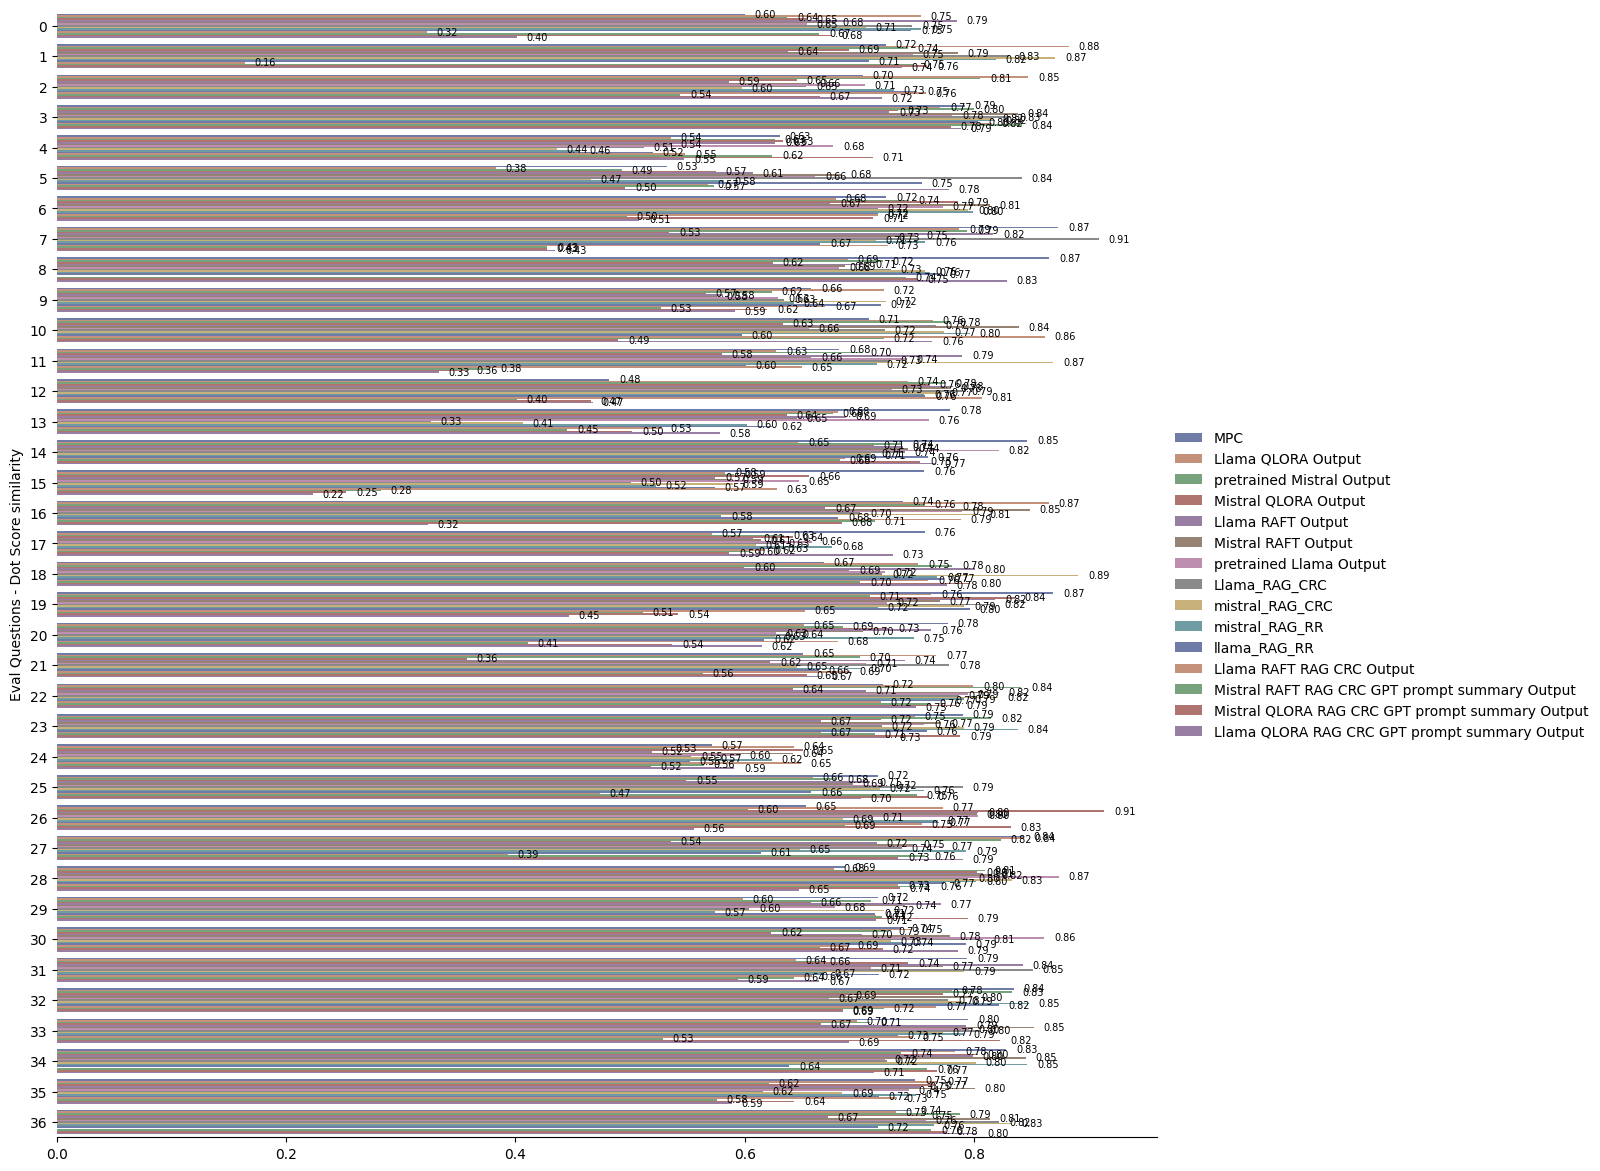

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualization setup
plot_compare_models = ['MPC',
       'Llama QLORA Output',
       'pretrained Mistral Output',
       'Mistral QLORA Output',
       'Llama RAFT Output', 'Mistral RAFT Output',
       'pretrained Llama Output',
       'Llama_RAG_CRC',
       'mistral_RAG_CRC','mistral_RAG_RR',
       'llama_RAG_RR',
       'Llama RAFT RAG CRC Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output',
       'Mistral QLORA RAG CRC GPT prompt summary Output',
       'Llama QLORA RAG CRC GPT prompt summary Output']
# Filtering results to focus on selected models
results_filtered = results_df[results_df['Model'].isin(plot_compare_models)]

# Visualization using seaborn
g = sns.catplot(
    data=results_filtered,
    kind="bar",
    y="Question", x="DotScore_Q", hue="Model", orient='h',
    errorbar="sd", palette="dark", alpha=.6, height=12
)
g.despine(left=True)
g.set_axis_labels("", "Eval Questions - Dot Score similarity")
g.legend.set_title("")

# Add labels to bars
for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=7, fontsize=7)

plt.show()

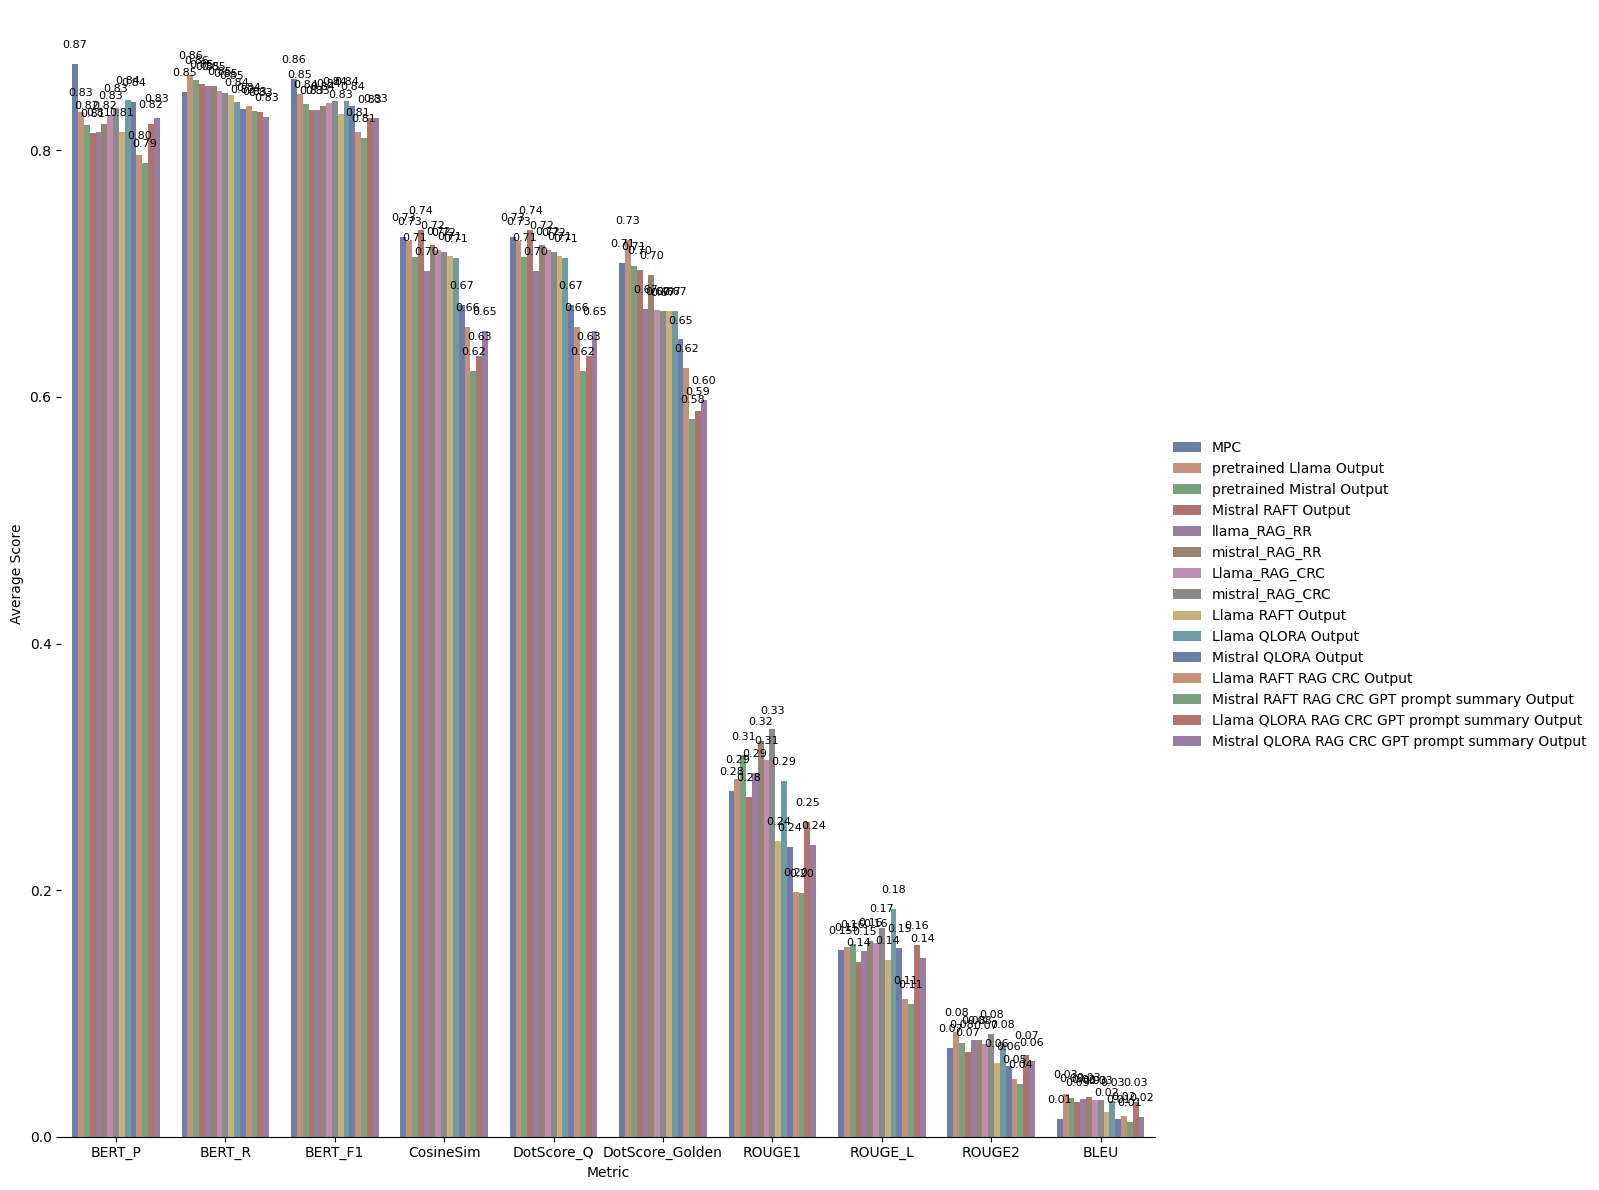

In [ ]:

# Finding average values for each metric per model
avg_metric_per_model = results_df.groupby("Model")[['DotScore_Q', 'DotScore_Golden', 'ROUGE1', 'ROUGE2', 'ROUGE_L', 'BLEU', 'BERT_P', 'BERT_R', 'BERT_F1', 'CosineSim']].mean()


# Melt data for better plotting
avg_metric_per_model_melted = avg_metric_per_model.reset_index().melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Sort the melted data by score for plotting
avg_metric_per_model_melted = avg_metric_per_model_melted.sort_values(by='Score', ascending=False)

# Visualization using seaborn
g = sns.catplot(
    data=avg_metric_per_model_melted,
    kind="bar",
    x="Metric", y="Score", hue="Model",
    palette="dark", alpha=.6, height=12
)
g.despine(left=True)
g.set_axis_labels("Metric", "Average Score")
g.legend.set_title("")

# Add labels to bars
for container in g.ax.containers:
    g.ax.bar_label(container, fmt='%.2f', padding=10, fontsize=8)

plt.show()

In [ ]:
'''
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util
from evaluate import load as load_metric
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from nltk.translate.meteor_score import meteor_score as nltk_meteor_score
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Initialize embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create a copy for appending metrics
df_copy = df.copy()  # Assuming `df` is pre-loaded

# Embed questions and golden answers
df_copy['questions_embed'] = df_copy['Golden Question'].apply(lambda x: torch.tensor(embedding_model.encode(x)).unsqueeze(0) if isinstance(x, str) else None)
df_copy['golden_embed'] = df_copy['Golden Answer'].apply(lambda x: torch.tensor(embedding_model.encode(x)).unsqueeze(0) if isinstance(x, str) else None)

# ROUGE scorer setup
rouge_scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Load BLEU metric
bleu_metric = load_metric("bleu")

# Function to tokenize text and handle NaN values by converting them to empty strings
def tokenize_text(text):
    return word_tokenize(str(text).lower()) if pd.notna(text) else []

# List of model response columns
model_responses = ['MPC', 'Llama QLORA Output', 'pretrained Mistral Output', 'Mistral QLORA Output', 'Llama RAFT Output', 'Mistral RAFT Output']

# Prepare to store results
results = []

# Iterate over each row
for i, row in df_copy.iterrows():
    reference = row["Golden Answer"]

    # Pair each model response with its name
    pairs = [(model, row[model]) for model in model_responses if model in row and isinstance(row[model], str)]

    if not pairs:
        continue

    candidate_models, candidate_responses = zip(*pairs)

    # Convert both into lists
    candidate_responses = list(candidate_responses)
    reference_list = [reference] * len(candidate_responses)

    # Embed responses as 2D tensors
    responses_emb = [torch.tensor(embedding_model.encode(res)).unsqueeze(0) for res in candidate_responses]

    # Convert existing embeds into 2D tensors
    questions_embed = row['questions_embed']
    golden_embed = row['golden_embed']

    # Dot Scores
    question_dot_scores = torch.mm(questions_embed, torch.cat(responses_emb).T).cpu().tolist()[0]
    golden_dot_scores = torch.mm(golden_embed, torch.cat(responses_emb).T).cpu().tolist()[0]

    # ROUGE Scores
    rouge_scores = [rouge_scorer.score(reference, res) for res in candidate_responses]

    # BLEU Scores
    bleu_scores = [bleu_metric.compute(predictions=[res], references=[reference])['bleu'] for res in candidate_responses]

    # BERTScore
    P_scores, R_scores, F1_scores = bert_score(candidate_responses, reference_list, lang="en", verbose=False)

    # METEOR Scores
    meteor_scores = [nltk_meteor_score(tokenize_text(reference), tokenize_text(res)) for res in candidate_responses]

    # Cosine Similarity
    def cosine_sim(a, b):
        return cosine_similarity(a.detach().numpy(), b.detach().numpy())[0][0]

    cosine_similarities = [cosine_sim(questions_embed, emb) for emb in responses_emb]

    # Store results
    for model, q_score, g_score, r_score, b_score, P, R, F1, meteor, cosine in zip(candidate_models, question_dot_scores, golden_dot_scores, rouge_scores, bleu_scores, P_scores, R_scores, F1_scores, meteor_scores, cosine_similarities):
        results.append({
            'Question': i,
            'Model': model,
            'DotScore_Q': q_score,
            'DotScore_Golden': g_score,
            'ROUGE1': r_score['rouge1'].fmeasure,
            'ROUGE2': r_score['rouge2'].fmeasure,
            'ROUGE_L': r_score['rougeL'].fmeasure,
            'BLEU': b_score,
            'BERT_P': P.item(),
            'BERT_R': R.item(),
            'BERT_F1': F1.item(),
            'METEOR': meteor,
            'CosineSim': cosine,
        })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Pivot to a wide format for clearer view
results_wide = results_df.pivot(index='Question', columns='Model')

# Rename columns for clarity
results_wide.columns = [f"{c[1]}_{c[0]}" for c in results_wide.columns]

# Finding maximum values for each metric
metric_columns = ['DotScore_Q', 'DotScore_Golden', 'ROUGE1', 'ROUGE2', 'ROUGE_L', 'BLEU', 'BERT_P', 'BERT_R', 'BERT_F1', 'METEOR', 'CosineSim']
for metric in metric_columns:
    max_row = results_df[metric].idxmax()
    max_value = results_df.iloc[max_row][metric]
    print(f"Maximum {metric} value is {max_value} from question {results_df.iloc[max_row]['Question']} and model {results_df.iloc[max_row]['Model']}")

# Calculating average values for each metric per model
avg_metric_per_model = results_df.groupby("Model")[metric_columns].mean()

print("Average metric scores per model:")
print(avg_metric_per_model)



#langsmith Embedding distance


checking hugging face embbedings: trial

In [ ]:
!pip install --upgrade --quiet  langchain langchain-openai



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00


In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.evaluation import load_evaluator

embedding_model = HuggingFaceEmbeddings()
hf_evaluator = load_evaluator("embedding_distance", embeddings=embedding_model)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
hf_evaluator.evaluate_strings(prediction="I shall go", reference="I shan't go")



/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


{'score': 0.5486447888001871}

In [ ]:
import os

#os.environ['OPENAI_API_KEY'] = 'sk-'
os.environ['OPENAI_API_KEY'] = 'sk-'


In [ ]:
#try evaluator :

from langchain.evaluation import EmbeddingDistance

list(EmbeddingDistance)


[<EmbeddingDistance.COSINE: 'cosine'>,
 <EmbeddingDistance.EUCLIDEAN: 'euclidean'>,
 <EmbeddingDistance.MANHATTAN: 'manhattan'>,
 <EmbeddingDistance.CHEBYSHEV: 'chebyshev'>,
 <EmbeddingDistance.HAMMING: 'hamming'>]

In [ ]:
# You can load by enum or by raw python string
evaluator = load_evaluator(
    "embedding_distance", distance_metric=EmbeddingDistance.COSINE
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
import pandas as pd
from langchain.evaluation import load_evaluator

# List of response columns
'''
response_columns = [
    'MPC', 'Llama QLORA Output', 'pretrained Mistral Output',
    'Mistral QLORA Output', 'Llama RAFT Output', 'Mistral RAFT Output','pretrained Llama Output'
]
'''

response_columns = ['MPC',
       'Llama QLORA Output',
       'pretrained Mistral Output',
       'Mistral QLORA Output',
       'Llama RAFT Output', 'Mistral RAFT Output',
      'pretrained Llama Output',
       'Llama_RAG_CRC',
       'mistral_RAG_CRC',  'mistral_RAG_RR',
       'llama_RAG_RR',
       'Llama RAFT RAG CRC Output',
       'Mistral RAFT RAG CRC GPT prompt summary Output',

       'Mistral QLORA RAG CRC GPT prompt summary Output',

       'Llama QLORA RAG CRC GPT prompt summary Output',
        'GPT4_MQR',
       'GPT4',  'Mistral_RLHF']


# Add new columns to store the embedding distance scores
for column in response_columns:
    new_column_name = f"{column}-embedding distance"
    df[new_column_name] = None  # Initialize column with None values

# Iterate over each row to compute embedding distances
for i, row in df.iterrows():
    reference = row['Golden Answer']  # Use "Golden Answer" as reference

    for column in response_columns:
        if pd.notna(row[column]):  # Check if the response exists
            prediction = row[column]

            # Compute embedding distance between the prediction and reference
            score = evaluator.evaluate_strings(prediction=prediction, reference=reference)

            # Store the distance score in the appropriate column
            df.at[i, f"{column}-embedding distance"] = score['score']



            # Display the result
            print(f"Question {i}, Model: {column}, Embedding Distance: {score['score']}")



Question 0, Model: MPC, Embedding Distance: 0.1375444001860725
Question 0, Model: Llama QLORA Output, Embedding Distance: 0.12043053773603962
Question 0, Model: pretrained Mistral Output, Embedding Distance: 0.11252164349708305
Question 0, Model: Mistral QLORA Output, Embedding Distance: 0.12420188745719307
Question 0, Model: Llama RAFT Output, Embedding Distance: 0.11197503172394685
Question 0, Model: Mistral RAFT Output, Embedding Distance: 0.1103876257989247
Question 0, Model: pretrained Llama Output, Embedding Distance: 0.11412724437961774
Question 0, Model: Llama_RAG_CRC, Embedding Distance: 0.10298000688070208
Question 0, Model: mistral_RAG_CRC, Embedding Distance: 0.11495261273959079
Question 0, Model: mistral_RAG_RR, Embedding Distance: 0.1186878175889372
Question 0, Model: llama_RAG_RR, Embedding Distance: 0.08288040985651413
Question 0, Model: Llama RAFT RAG CRC Output, Embedding Distance: 0.28406589164331375
Question 0, Model: Mistral RAFT RAG CRC GPT prompt summary Output, 

In [ ]:
for col in df.columns:
    if "-embedding distance" in col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Average embedding distance scores per model:")
for column in response_columns:
    distance_column = f"{column}-embedding distance"
    avg_distance = df[distance_column].mean()
    print(f"{distance_column}: {avg_distance}")


Average embedding distance scores per model:
MPC-embedding distance: 0.09755423379413795
Llama QLORA Output-embedding distance: 0.10353825208786986
pretrained Mistral Output-embedding distance: 0.0968995825106302
Mistral QLORA Output-embedding distance: 0.12000714053778253
Llama RAFT Output-embedding distance: 0.1059124294558114
Mistral RAFT Output-embedding distance: 0.09750115046050684
pretrained Llama Output-embedding distance: 0.08454155765491614
Llama_RAG_CRC-embedding distance: 0.10397132180190785
mistral_RAG_CRC-embedding distance: 0.10617484749652209
mistral_RAG_RR-embedding distance: 0.10058505335781652
llama_RAG_RR-embedding distance: 0.09756403538263653
Llama RAFT RAG CRC Output-embedding distance: 0.14203262862070862
Mistral RAFT RAG CRC GPT prompt summary Output-embedding distance: 0.13716023724023516
Mistral QLORA RAG CRC GPT prompt summary Output-embedding distance: 0.13424554866810148
Llama QLORA RAG CRC GPT prompt summary Output-embedding distance: 0.1344539597944705
G

In [ ]:
import pandas as pd

# Assuming `response_columns` is a list containing column names
# and `df` is your DataFrame containing the distance columns

# Create an empty dictionary to store results
results = {}

# Loop through each column
for column in response_columns:
    distance_column = f"{column}-embedding distance"
    avg_distance = df[distance_column].mean()
    results[distance_column] = avg_distance

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results.items(), columns=['Column', 'Embedding Distance'])

# Print the DataFrame
print(results_df)


                                               Column  Embedding Distance
0                              MPC-embedding distance            0.097554
1               Llama QLORA Output-embedding distance            0.103538
2        pretrained Mistral Output-embedding distance            0.096900
3             Mistral QLORA Output-embedding distance            0.120007
4                Llama RAFT Output-embedding distance            0.105912
5              Mistral RAFT Output-embedding distance            0.097501
6          pretrained Llama Output-embedding distance            0.084542
7                    Llama_RAG_CRC-embedding distance            0.103971
8                  mistral_RAG_CRC-embedding distance            0.106175
9                   mistral_RAG_RR-embedding distance            0.100585
10                    llama_RAG_RR-embedding distance            0.097564
11       Llama RAFT RAG CRC Output-embedding distance            0.142033
12  Mistral RAFT RAG CRC GPT prompt su

In [ ]:
results_df.to_csv("/content/drive/MyDrive/5_4_allmodels_rlhf_embeddingdistance_1023.csv", index=False)


In [ ]:
import pandas as pd
from langchain.evaluation import load_evaluator
from IPython.display import display


# Convert distance scores to numeric for calculations
for col in df.columns:
    if "-embedding distance" in col:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Reshape the dataframe
distance_cols = [f"{col}-embedding distance" for col in response_columns]
results_wide = df[["Index"] + distance_cols].melt(id_vars="Index", var_name="Model", value_name="Embedding Distance")
results_wide["Model"] = results_wide["Model"].str.replace("-embedding distance", "")

# Pivot for display
results_pivot = results_wide.pivot(index="Index", columns="Model", values="Embedding Distance")

# Highlight max values function
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# Style for display
results_styled = results_pivot.style.apply(highlight_min, axis=1)

# Display
display(results_styled)


Model,Llama QLORA Output,Llama QLORA RAG CRC GPT prompt summary Output,Llama RAFT Output,Llama RAFT RAG CRC Output,Llama_RAG_CRC,MPC,Mistral QLORA Output,Mistral QLORA RAG CRC GPT prompt summary Output,Mistral RAFT Output,Mistral RAFT RAG CRC GPT prompt summary Output,llama_RAG_RR,mistral_RAG_CRC,mistral_RAG_RR,pretrained Llama Output,pretrained Mistral Output
Index,,,,,,,,,,,,,,,
1,0.120431,0.126069,0.111975,0.281493,0.107179,0.137544,0.124202,0.122315,0.110388,0.143563,0.082868,0.114953,0.118688,0.114127,0.112406
2,0.236546,0.228975,0.223864,0.334637,0.202661,0.180142,0.217749,0.226675,0.195362,0.212077,0.197667,0.197493,0.211100,0.199508,0.203053
3,0.125749,0.132128,0.098307,0.104495,0.107226,0.127899,0.192690,0.144445,0.120335,0.171563,0.096197,0.110517,0.120297,0.078146,0.082056
4,0.037610,0.047881,0.087245,0.053456,0.029338,0.067089,0.113421,0.044034,0.036015,0.042516,0.034848,0.036373,0.033124,0.047399,0.039695
5,0.140371,0.133803,0.151937,0.124992,0.140493,0.158405,0.149005,0.118209,0.158981,0.112490,0.102374,0.118486,0.111314,0.093775,0.136428
6,0.170422,0.144566,0.101741,0.156673,0.115286,0.127129,0.153583,0.217518,0.109488,0.210280,0.142124,0.153181,0.173235,0.096527,0.143794
7,0.124128,0.201771,0.130693,0.123102,0.086659,0.125186,0.120964,0.136582,0.099155,0.213203,0.104924,0.107311,0.106357,0.090159,0.114711
8,0.051908,0.176497,0.062763,0.059543,0.054868,0.040926,0.136495,0.180970,0.041011,0.192386,0.070380,0.084320,0.043368,0.025966,0.036887
9,0.069545,0.073766,0.121093,nan,0.095497,0.082180,0.085009,0.113005,0.069613,0.063437,0.067377,0.085614,0.073042,0.065267,0.075372


In [ ]:
df.to_csv("/content/drive/MyDrive/298b/inferences/may3_allmodels_eval_v1/may3_try1_allmodels_evaluation_embeddingdistance.csv", index=False)

print("Embedding distances computed and saved to: /content/drive/MyDrive/298b/inferences/may3_allmodels_eval_v1/may3_try1_allmodels_evaluation_embeddingdistance.csv")


Embedding distances computed and saved to: /content/drive/MyDrive/298b/inferences/may3_allmodels_eval_v1/may3_try1_allmodels_evaluation_embeddingdistance.csv
